# Installs

In [1]:
!pip install tensorflow==2.10 keras==2.10

You should consider upgrading via the 'C:\Users\user\Desktop\QInnovision_World_Challenge\Quantum_Federated_Learning\q_env\Scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
!pip install pandas
!pip install seaborn
!pip install sklearn

You should consider upgrading via the 'C:\Users\user\Desktop\QInnovision_World_Challenge\Quantum_Federated_Learning\q_env\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\user\Desktop\QInnovision_World_Challenge\Quantum_Federated_Learning\q_env\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\user\Desktop\QInnovision_World_Challenge\Quantum_Federated_Learning\q_env\Scripts\python.exe -m pip install --upgrade pip' command.


In [3]:
!pip install pennylane
!pip install numpy

You should consider upgrading via the 'C:\Users\user\Desktop\QInnovision_World_Challenge\Quantum_Federated_Learning\q_env\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\user\Desktop\QInnovision_World_Challenge\Quantum_Federated_Learning\q_env\Scripts\python.exe -m pip install --upgrade pip' command.


In [4]:
!pip install imblearn

You should consider upgrading via the 'C:\Users\user\Desktop\QInnovision_World_Challenge\Quantum_Federated_Learning\q_env\Scripts\python.exe -m pip install --upgrade pip' command.


In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

# Classifier Libraries
import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [6]:
import tensorflow as tf

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pennylane as qml
from pennylane import numpy as np
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dropout

In [8]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

## Functions

In [9]:
from imblearn.over_sampling import SMOTE
import pandas as pd

from imblearn.over_sampling import SMOTE
import pandas as pd

def balance_with_smote(df, target_col='Class', smote_ratio=0.15, random_state=42):
    """Apply SMOTE to increase the minority class size by a specified ratio."""
    X = df.drop(columns=[target_col])
    y = df[target_col]

    # Apply SMOTE with a limited ratio
    smote = SMOTE(sampling_strategy=smote_ratio, random_state=random_state)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    balanced_df = pd.DataFrame(X_resampled, columns=X.columns)
    balanced_df[target_col] = y_resampled
    return balanced_df

In [10]:
def count_fraud_percentage(df, fraud_col='isFraud'):
    """
    Calculate the count and percentage of fraud cases in a DataFrame.

    """

    fraud_count = df[fraud_col].sum()

    total_count = len(df)
    fraud_percentage = (fraud_count / total_count) * 100

    return fraud_count, fraud_percentage

# Data Loading

If using the google_colab then we can use the kaggle interface to download the needed datasets.

In order to download the dataset what you need to do is to download the kaggle.json file from the kaggle.com site.



In [11]:
# from google.colab import files

# files.upload()  # This will prompt you to upload kaggle.json

# # Make a directory for Kaggle and move the file there
# !mkdir -p ~/.kaggle
# !mv kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

# # Now you can download the dataset
# !kaggle datasets download -d ealaxi/paysim1 -p /content/datasets --unzip

# print("Dataset downloaded to: /content/datasets")

In [12]:
# finance_df=pd.read_csv("/content/datasets/PS_20174392719_1491204439457_log.csv",delimiter=',')
# finance_df.describe()

If using local interpeters, you will need to download the dataset and then import it:

In [13]:
finance_df=pd.read_csv("../../Datasets/PS_20174392719_1491204439457_log.csv",delimiter=',')
finance_df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [14]:
df=finance_df

In [15]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In this following part we are sampling the data so we keep a correct distribution but also reduce the amount of data for faster training.

In [16]:
# Sort by 'step' to ensure time ordering
finance_df_sorted = df.sort_values(by='step')

# Calculate the interval for sampling evenly across time
interval = len(finance_df_sorted) // 30000

# Sample the dataset
sampled_df = finance_df_sorted.iloc[::interval][:30000]

# Display or save the sampled dataset
sampled_df.reset_index(drop=True, inplace=True)
print(sampled_df)


       step     type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0         1  PAYMENT    9839.64  C1231006815      170136.00       160296.36   
1         1  PAYMENT    2569.57  C1378559537       90233.00        87663.43   
2         1  PAYMENT     413.84    C85357160       26512.93        26099.09   
3         1  PAYMENT    9614.73  C1789282489      275664.00       266049.27   
4         1  CASH_IN   38883.63  C1323235180      787973.40       826857.03   
...     ...      ...        ...          ...            ...             ...   
29995   715  CASH_IN  128546.21  C1412384082       40827.00       169373.21   
29996   715  CASH_IN  237604.73  C1925516382       15741.00       253345.73   
29997   715  CASH_IN  100878.16   C698031251         845.00       101723.16   
29998   715  PAYMENT   18296.12  C1284190725       40949.00        22652.88   
29999   715  PAYMENT    8633.79   C439434213         286.00            0.00   

          nameDest  oldbalanceDest  newbalanceDest 

In [17]:
finance_df=sampled_df

### Cleaning

In [18]:
df_cleaned = finance_df.loc[(finance_df['type'].isin(['CASH_OUT', 'TRANSFER'])),:]
df_cleaned.drop(columns=['nameOrig','nameDest','isFlaggedFraud'],inplace=True)
df_cleaned['type'] = finance_df['type'].map({'CASH_OUT': 0, 'TRANSFER': 1})
df_cleaned

C:\Users\user\AppData\Local\Temp\ipykernel_3348\2790843773.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(columns=['nameOrig','nameDest','isFlaggedFraud'],inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_3348\2790843773.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['type'] = finance_df['type'].map({'CASH_OUT': 0, 'TRANSFER': 1})


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
8,1,0.0,50101.88,0.0,0.00,67684.00,9940339.29,0
27,6,0.0,7106.23,0.0,0.00,30691.00,37797.23,0
33,6,1.0,820399.29,0.0,0.00,7829762.55,10833791.00,0
36,7,0.0,10118.23,0.0,0.00,29207.00,0.00,0
45,7,1.0,437410.02,100589.0,0.00,17384.73,87715.94,0
...,...,...,...,...,...,...,...,...
29977,709,0.0,305637.27,0.0,0.00,734247.90,1039885.16,0
29987,710,0.0,323602.71,147.0,0.00,854137.32,1177740.03,0
29990,710,0.0,51602.84,37658.0,0.00,0.00,51602.84,0
29992,714,0.0,122441.76,11685.0,0.00,0.00,122441.76,0


In [19]:
df_smote_balanced = balance_with_smote(df_cleaned, target_col='isFraud', smote_ratio=0.1, random_state=42)
fraud_count_smote, fraud_percentage_smote = count_fraud_percentage(df_smote_balanced)
print(f"After SMOTE - Fraudulent: {fraud_count_smote}, Fraud Percentage: {fraud_percentage_smote:.2f}%")

After SMOTE - Fraudulent: 1298, Fraud Percentage: 9.09%


In [20]:
final_df=df_smote_balanced

In [21]:
final_df = final_df.sort_values(by='step').astype(float)

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
final_df[final_df.columns] = scaler.fit_transform(final_df[final_df.columns])
final_df

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,0.000000,0.0,0.001312,0.000000,0.000000,0.000388,0.056893,0.0
1,0.007013,0.0,0.000185,0.000000,0.000000,0.000176,0.000216,0.0
2,0.007013,1.0,0.021504,0.000000,0.000000,0.044898,0.062007,0.0
9,0.008415,1.0,0.002310,0.000000,0.000000,0.002715,0.003215,0.0
7,0.008415,0.0,0.006120,0.000000,0.000000,0.001343,0.001528,0.0
...,...,...,...,...,...,...,...,...
13012,0.992987,0.0,0.000523,0.040433,0.040239,0.002521,0.002631,0.0
13016,0.994390,0.0,0.008481,0.000027,0.000000,0.004898,0.006741,0.0
13017,0.994390,0.0,0.001351,0.007021,0.000000,0.000000,0.000295,0.0
13018,1.000000,0.0,0.003208,0.002178,0.000000,0.000000,0.000701,0.0


In [23]:
df=final_df

In [24]:
# Selecting the top 4 features excluding 'isFraud'
top_features = final_df.corr()['isFraud'].abs().sort_values(ascending=False).iloc[1:5].index
# Creating a new DataFrame with only the top features and the target column
final_df_filtered = final_df[top_features.tolist() + ['isFraud']].to_numpy()

In [25]:
column_names = top_features.tolist() + ['isFraud']  # Add back column names
final_df_filtered = pd.DataFrame(final_df_filtered, columns=column_names)

# Display the resulting DataFrame
print(final_df_filtered)

       oldbalanceOrg  type    amount      step  isFraud
0           0.000000   0.0  0.001312  0.000000      0.0
1           0.000000   0.0  0.000185  0.007013      0.0
2           0.000000   1.0  0.021504  0.007013      0.0
3           0.000000   1.0  0.002310  0.008415      0.0
4           0.000000   0.0  0.006120  0.008415      0.0
...              ...   ...       ...       ...      ...
14278       0.040433   0.0  0.000523  0.992987      0.0
14279       0.000027   0.0  0.008481  0.994390      0.0
14280       0.007021   0.0  0.001351  0.994390      0.0
14281       0.002178   0.0  0.003208  1.000000      0.0
14282       0.008817   0.0  0.000814  1.000000      0.0

[14283 rows x 5 columns]


In [26]:
final_df_filtered

,oldbalanceOrg,type,amount,step,isFraud
0,0.000000,0.0,0.001312,0.000000,0.0
1,0.000000,0.0,0.000185,0.007013,0.0
2,0.000000,1.0,0.021504,0.007013,0.0
3,0.000000,1.0,0.002310,0.008415,0.0
4,0.000000,0.0,0.006120,0.008415,0.0
...,...,...,...,...,...
14278,0.040433,0.0,0.000523,0.992987,0.0
14279,0.000027,0.0,0.008481,0.994390,0.0
14280,0.007021,0.0,0.001351,0.994390,0.0
14281,0.002178,0.0,0.003208,1.000000,0.0


In [27]:
type(final_df_filtered)

pandas.core.frame.DataFrame

In [28]:
y = df['isFraud']
X = df.drop(columns=['isFraud'])

In [29]:
y_reduced = final_df_filtered['isFraud']
X_reduced = final_df_filtered.drop(columns=['isFraud'])

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)
X_reduced =scaler.fit_transform(X_reduced)

In [31]:
y.value_counts()

isFraud
0.0    12985
1.0     1298
Name: count, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Split temp into validation and test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [33]:
from sklearn.model_selection import train_test_split

X_reduced_train, X_reduced_temp, y_train_reduced, y_temp_reduced = train_test_split(X_reduced, y_reduced, test_size=0.4, random_state=42)

# Split temp into validation and test
X_reduced_val, X_reduced_test, y_val_reduced, y_test_reduced = train_test_split(X_reduced_temp, y_temp_reduced, test_size=0.5, random_state=42)

In [34]:
X_reduced

array([[-0.27636351, -0.55512407, -0.34476116, -1.72442426],
       [-0.27636351, -0.55512407, -0.39203129, -1.68963754],
       [-0.27636351,  1.82590103,  0.50211654, -1.68963754],
       ...,
       [-0.18853564, -0.55512407, -0.34311098,  3.2083328 ],
       [-0.24911117, -0.55512407, -0.26522951,  3.23616217],
       [-0.16605975, -0.55512407, -0.3656455 ,  3.23616217]])

In [35]:
X_train.shape

(8569, 7)

In [36]:
y_train.value_counts()

isFraud
0.0    7771
1.0     798
Name: count, dtype: int64

Defining a QNode
================



In [37]:
import pennylane as qml
import numpy as np

n_qubits = 3
dev = qml.device("default.qubit", wires=n_qubits+1)

from itertools import combinations

def custom_layer(weights, n_qubits):
    index = 0  # Initialize index to track unique weights

    # Apply first set of RY gates
    for i in range(n_qubits + 1):
        qml.RY(weights[index], wires=i)
        index += 1  # Increment index

    # Apply first set of CNOT gates
    pairs = [(0, 1), (1, 2), (2, 3), (3, 0)]
    for pair in pairs:
        qml.CNOT(wires=pair)

    # Apply second set of RY gates
    for i in range(n_qubits + 1):
        qml.RY(weights[index], wires=i)
        index += 1  # Increment index

    # Apply second set of CNOT gates
    pairs = [(0, 2), (2, 0)]
    for pair in pairs:
        qml.CNOT(wires=pair)

    # Apply RY gates on qubit 3
    qml.RY(weights[index], wires=3)
    index += 1  # Increment index
    qml.RY(weights[index], wires=3)
    index += 1  # Increment index

    # Apply nested RY gates for two layers
    for j in range(2):
        for i in range(n_qubits):
            qml.RY(weights[index], wires=i)
            index += 1  # Increment index

    # Apply third set of CNOT gates
    pairs = [(0, 1), (1, 2), (2, 3), (3, 0)]
    for pair in pairs:
        qml.CNOT(wires=pair)

    # Apply final set of RZ gates
    for i in range(n_qubits + 1):
        qml.RZ(weights[index], wires=i)
        index += 1  # Increment index

@qml.qnode(dev)
def qnode(inputs, weights):
    qml.AngleEmbedding(inputs, wires=range(n_qubits+1))
    # print("AAAAAAAAAAAAAAAAAAAAA")
    # i=0
    for w in weights:
        # print(i)
        custom_layer(w,n_qubits)
        # i+=1
    outputs = [qml.expval(qml.PauliZ(wires=i)) for i in range(n_qubits)]
    return outputs


In [38]:
import pennylane as qml
import numpy as np

n_qubits = 3
dev = qml.device("default.qubit", wires=n_qubits+1)

from itertools import combinations

def custom_layer_long(weights, n_qubits):
    index = 0  # Start index for weights

    # First block of RY
    for i in range(n_qubits + 1):
        qml.RY(weights[index], wires=i)
        index += 1

    # First set of CNOT pairs
    pairs = [(0, 1), (1, 2), (2, 3), (3, 0)]
    for pair in pairs:
        qml.CNOT(wires=pair)

    # Second block of RY
    for i in range(n_qubits + 1):
        qml.RY(weights[index], wires=i)
        index += 1

    # Second set of CNOT pairs
    pairs = [(0, 2), (2, 0)]
    for pair in pairs:
        qml.CNOT(wires=pair)

    # Third block of RY (single qubit repeated)
    qml.RY(weights[index], wires=3)
    index += 1
    qml.RY(weights[index], wires=3)
    index += 1

    # Nested loop of RY
    for j in range(2):
        for i in range(n_qubits):
            qml.RY(weights[index], wires=i)
            index += 1

    # Third set of CNOT pairs
    pairs = [(0, 1), (1, 2), (2, 3), (3, 0)]
    for pair in pairs:
        qml.CNOT(wires=pair)

    # First block of RZ
    for i in range(n_qubits + 1):
        qml.RZ(weights[index], wires=i)
        index += 1

    # Fourth set of CNOT pairs
    pairs = [(0, 2), (2, 0)]
    for pair in pairs:
        qml.CNOT(wires=pair)

    # Fourth block of RY (single qubit repeated)
    qml.RY(weights[index], wires=3)
    index += 1
    qml.RY(weights[index], wires=3)
    index += 1

    # Second block of RZ
    for i in range(n_qubits):
        qml.RZ(weights[index], wires=i)
        index += 1

    # Third block of RY
    for i in range(n_qubits):
        qml.RY(weights[index], wires=i)
        index += 1

    # Fifth set of CNOT pairs
    pairs = [(0, 1), (1, 2), (2, 3), (3, 0)]
    for pair in pairs:
        qml.CNOT(wires=pair)

    # Final block of RZ
    for i in range(n_qubits + 1):
        qml.RZ(weights[index], wires=i)
        index += 1

    return index  # Total number of indices used

@qml.qnode(dev)
def qnode_long(inputs, weights):
    qml.AngleEmbedding(inputs, wires=range(n_qubits+1))
    # print("AAAAAAAAAAAAAAAAAAAAA")
    # i=0
    for w in weights:
        # print(i)
        custom_layer_long(w,n_qubits)
        # i+=1
    outputs = [qml.expval(qml.PauliZ(wires=i)) for i in range(n_qubits)]
    return outputs

In [39]:
@qml.qnode(dev)
def qnode_long_solo(inputs, weights):
    qml.AngleEmbedding(inputs, wires=range(n_qubits+1))
    # print("AAAAAAAAAAAAAAAAAAAAA")
    # i=0
    for w in weights:
        # print(i)
        custom_layer_long(w,n_qubits)
        # i+=1
    outputs = [qml.expval(qml.PauliZ(wires=0)),qml.expval(qml.PauliZ(wires=1))]
    return outputs

Checking the Quantum Circuit
======================



In [40]:
import pennylane as qml
import matplotlib.pyplot as plt

In [41]:
n_layers = 1
n_qubits=3
total_weights = 3 * (n_qubits + 1) + 2 * n_qubits + 2

weight_shapes = {"weights": (n_layers, total_weights+1)}

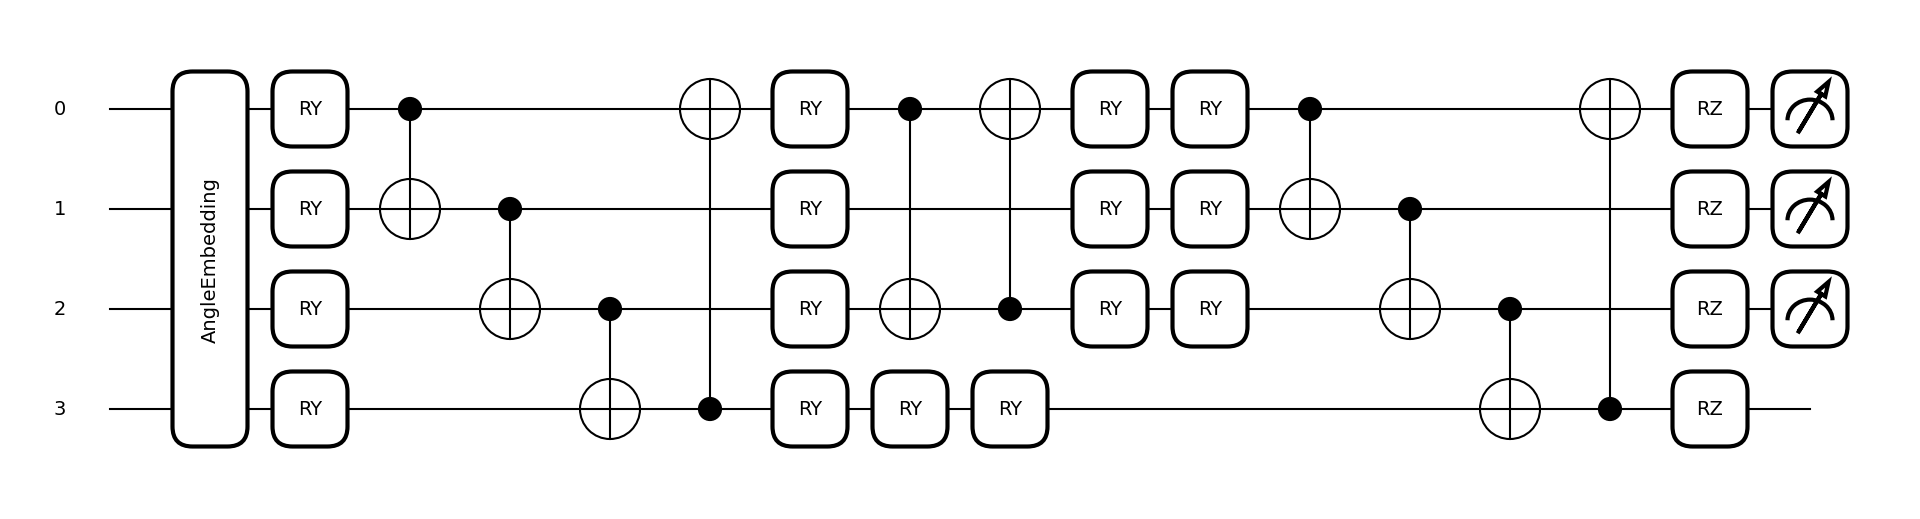

In [42]:
weights = np.random.random(size=(n_layers, total_weights))
fig, ax = qml.draw_mpl(qnode)(X[:, :4], weights)
plt.show()

In [43]:
n_layers = 1
n_qubits=3
total_weights_long = 32
print("Total weights required:", total_weights_long)

weight_shapes_long = {"weights": (n_layers, total_weights_long+1)}

Total weights required: 32


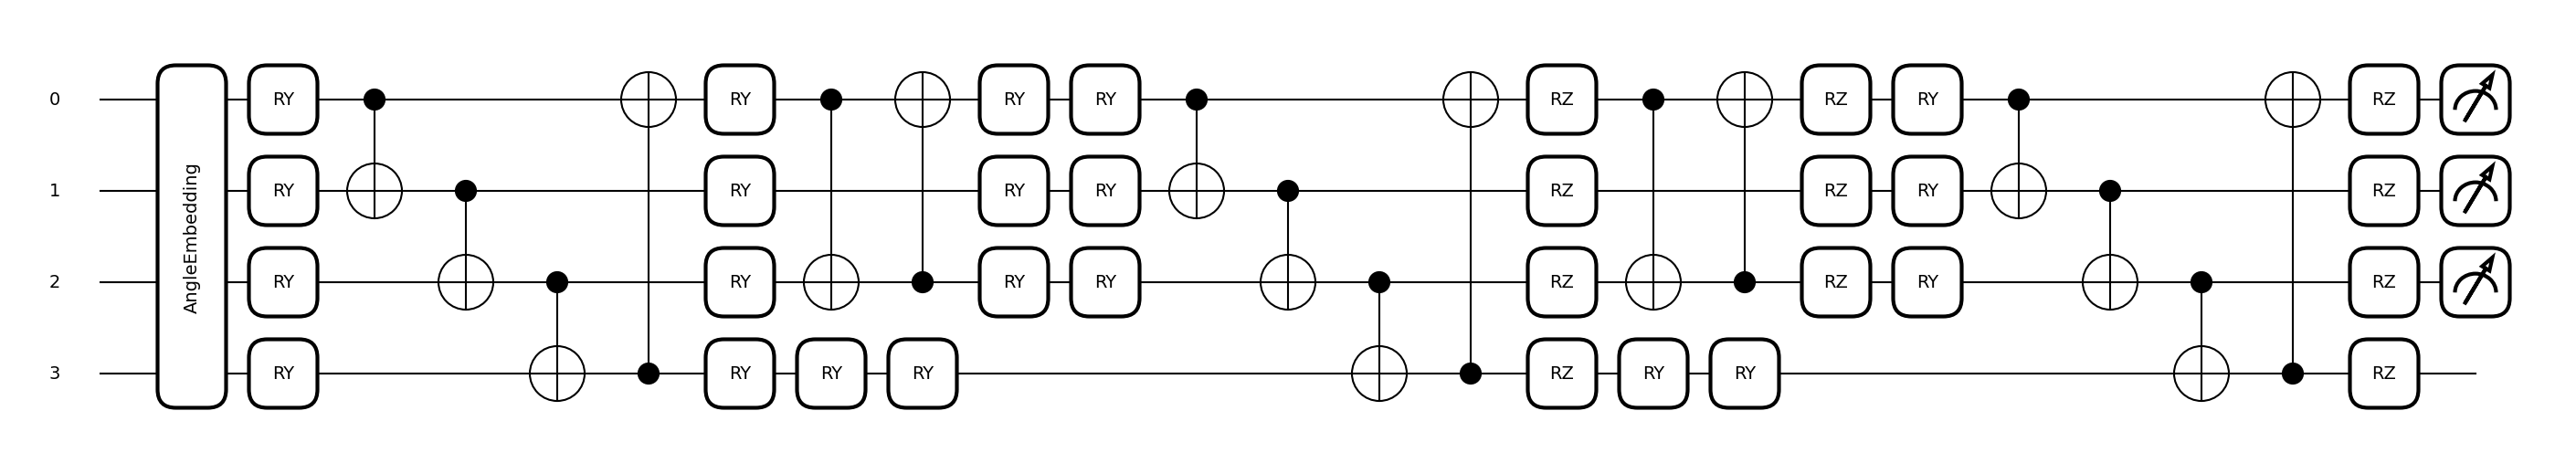

In [44]:
weights = np.random.random(size=(n_layers, total_weights_long))
fig, ax = qml.draw_mpl(qnode_long)(X[:, :4], weights)

plt.show()

In [45]:
qlayer = qml.qnn.KerasLayer(qnode, weight_shapes, output_dim=n_qubits)

In [46]:
qlayer_long = qml.qnn.KerasLayer(qnode_long, weight_shapes_long, output_dim=n_qubits)

# Checking The Influence of Quantum Model

For this to be implemented we lowered the amount of data used to have a faster run of the quantum circuit

In [37]:
from sklearn.metrics import classification_report

In [38]:
n_layers = 1
n_qubits=3
total_weights_long = 32
print("Total weights required:", total_weights_long)

weight_shapes_long = {"weights": (n_layers, total_weights_long+1)}

Total weights required: 32


In [39]:
qlayer_long = qml.qnn.KerasLayer(qnode_long, weight_shapes_long, output_dim=n_qubits)

In [48]:
n_inputs = X_train.shape[1]

classic_model = Sequential([
    Dense(4, activation=tf.nn.relu),
    Dense(2, activation=tf.nn.softmax)
])

classic_model.compile(optimizer=Adam(lr=0.01),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

classic_model.fit(X_train, y_train, validation_split=0.2,batch_size=20,epochs=10,shuffle=True,verbose=2)



Epoch 1/10


c:\Users\user\Desktop\QInnovision_World_Challenge\Quantum_Federated_Learning\q_env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


374/374 - 1s - loss: 0.2174 - accuracy: 0.9097 - val_loss: 0.0998 - val_accuracy: 0.9588 - 878ms/epoch - 2ms/step
Epoch 2/10
374/374 - 0s - loss: 0.0848 - accuracy: 0.9690 - val_loss: 0.0794 - val_accuracy: 0.9679 - 342ms/epoch - 915us/step
Epoch 3/10
374/374 - 0s - loss: 0.0687 - accuracy: 0.9737 - val_loss: 0.0637 - val_accuracy: 0.9834 - 394ms/epoch - 1ms/step
Epoch 4/10
374/374 - 0s - loss: 0.0584 - accuracy: 0.9782 - val_loss: 0.0601 - val_accuracy: 0.9738 - 354ms/epoch - 947us/step
Epoch 5/10
374/374 - 0s - loss: 0.0523 - accuracy: 0.9797 - val_loss: 0.0497 - val_accuracy: 0.9770 - 353ms/epoch - 943us/step
Epoch 6/10
374/374 - 0s - loss: 0.0472 - accuracy: 0.9813 - val_loss: 0.0480 - val_accuracy: 0.9786 - 358ms/epoch - 957us/step
Epoch 7/10
374/374 - 0s - loss: 0.0438 - accuracy: 0.9837 - val_loss: 0.0387 - val_accuracy: 0.9893 - 352ms/epoch - 940us/step
Epoch 8/10
374/374 - 0s - loss: 0.0398 - accuracy: 0.9834 - val_loss: 0.0348 - val_accuracy: 0.9893 - 359ms/epoch - 961us/step

In [49]:
y_pred = np.argmax(classic_model.predict(X_test), axis=-1)
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)

# Optional: Display a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

98/98 [==============================] - 0s 917us/step
Confusion Matrix:
[[2603    5]
 [  34  475]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      2608
         1.0       0.99      0.93      0.96       509

    accuracy                           0.99      3117
   macro avg       0.99      0.97      0.98      3117
weighted avg       0.99      0.99      0.99      3117



Now focusing on the Quantum Part

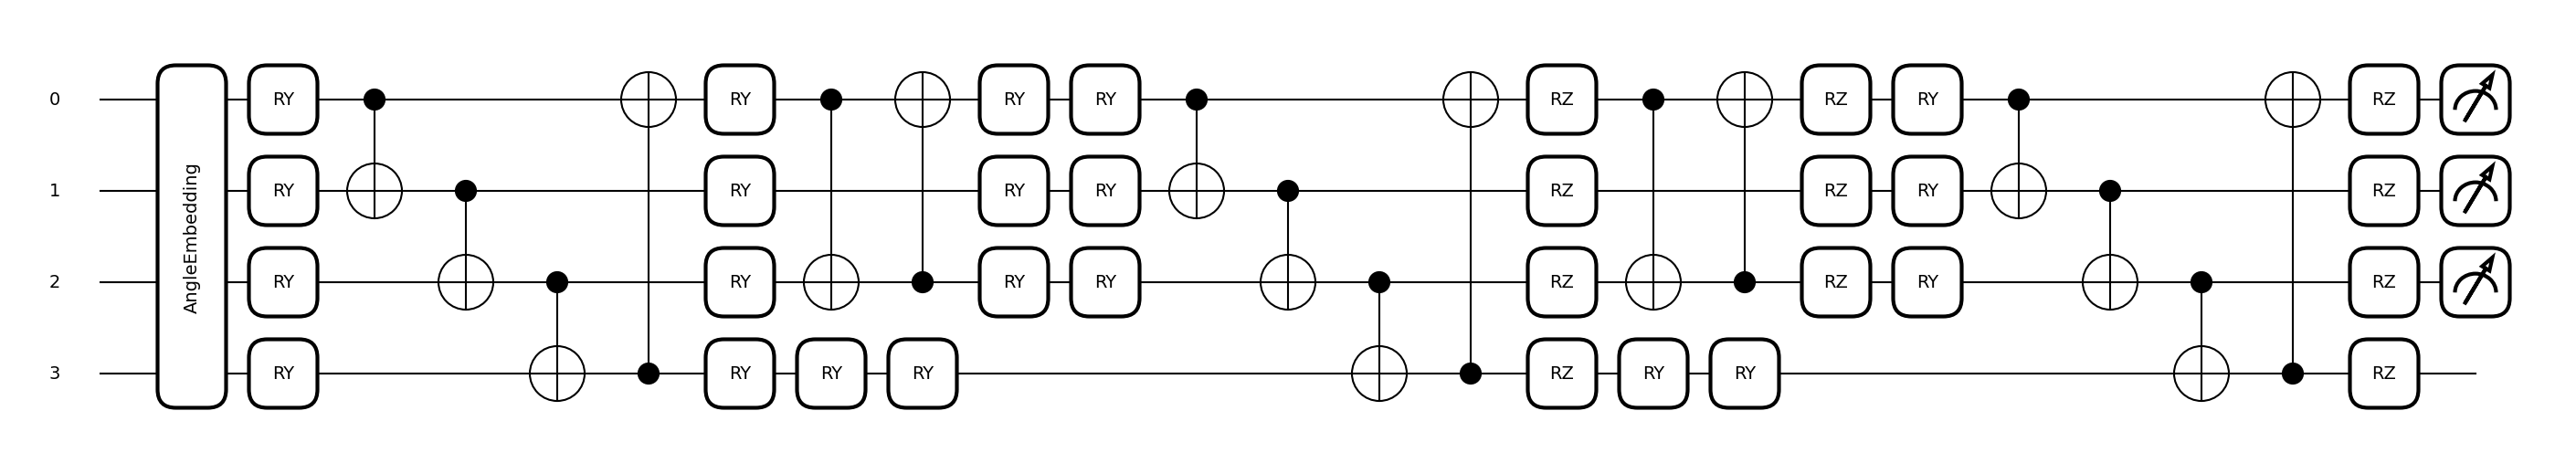

In [39]:
fig, ax = qml.draw_mpl(qnode_long)(X[:, :4], weights)

In [40]:
n_inputs = X_train.shape[1]

quantum_model = Sequential([
    Dense(4, activation=tf.nn.relu),
    qlayer_long,
    Dense(2, activation=tf.nn.softmax)
])

quantum_model.compile(optimizer=Adam(lr=0.01),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

quantum_model.fit(X_train, y_train, validation_split=0.2,batch_size=25,epochs=10,shuffle=True,verbose=2)

Epoch 1/10


e:\EPA\Quantum\Qinnovision 2025\Quantum Federated Learning for Fraud Detection\qinnovision\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


300/300 - 125s - loss: 0.2115 - accuracy: 0.9152 - val_loss: 0.0998 - val_accuracy: 0.9615 - 125s/epoch - 416ms/step
Epoch 2/10
300/300 - 125s - loss: 0.0829 - accuracy: 0.9695 - val_loss: 0.0735 - val_accuracy: 0.9786 - 125s/epoch - 415ms/step
Epoch 3/10
300/300 - 117s - loss: 0.0674 - accuracy: 0.9782 - val_loss: 0.0640 - val_accuracy: 0.9829 - 117s/epoch - 391ms/step
Epoch 4/10
300/300 - 132s - loss: 0.0583 - accuracy: 0.9807 - val_loss: 0.0594 - val_accuracy: 0.9840 - 132s/epoch - 440ms/step
Epoch 5/10
300/300 - 114s - loss: 0.0530 - accuracy: 0.9818 - val_loss: 0.0490 - val_accuracy: 0.9866 - 114s/epoch - 381ms/step
Epoch 6/10
300/300 - 117s - loss: 0.0498 - accuracy: 0.9822 - val_loss: 0.0524 - val_accuracy: 0.9845 - 117s/epoch - 389ms/step
Epoch 7/10
300/300 - 122s - loss: 0.0472 - accuracy: 0.9826 - val_loss: 0.0455 - val_accuracy: 0.9866 - 122s/epoch - 406ms/step
Epoch 8/10
300/300 - 130s - loss: 0.0426 - accuracy: 0.9849 - val_loss: 0.0414 - val_accuracy: 0.9866 - 130s/epoch 

In [41]:
from sklearn.metrics import classification_report

y_pred = np.argmax(quantum_model.predict(X_test), axis=-1)
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

98/98 [==============================] - 14s 141ms/step
Confusion Matrix:
[[2590   18]
 [  10  499]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      2608
         1.0       0.97      0.98      0.97       509

    accuracy                           0.99      3117
   macro avg       0.98      0.99      0.98      3117
weighted avg       0.99      0.99      0.99      3117



So as we see here even though the accuracy has supposedly dropped, we have gained a 2% increase in the recall

In [ ]:
quantum_model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 4)                 32        
                                                                 
 keras_layer_22 (KerasLayer)  multiple                 33        
                                                                 
 dense_33 (Dense)            (None, 2)                 8         
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


We are running the test one more time to be sure of the quality of the proposed Architecture

In [42]:
n_inputs = X_train.shape[1]

quantum_model_2 = Sequential([
    Dense(4, activation=tf.nn.relu),
    qlayer_long,
    Dense(2, activation=tf.nn.softmax)
])

quantum_model_2.compile(optimizer=Adam(lr=0.01),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

quantum_model_2.fit(X_train, y_train, validation_split=0.2,batch_size=25,epochs=10,shuffle=True,verbose=2)

Epoch 1/10


c:\Users\user\Desktop\QInnovision_World_Challenge\Quantum_Federated_Learning\q_env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


300/300 - 94s - loss: 0.2260 - accuracy: 0.9130 - val_loss: 0.1221 - val_accuracy: 0.9401 - 94s/epoch - 313ms/step
Epoch 2/10
300/300 - 94s - loss: 0.0878 - accuracy: 0.9690 - val_loss: 0.0730 - val_accuracy: 0.9781 - 94s/epoch - 315ms/step
Epoch 3/10
300/300 - 97s - loss: 0.0638 - accuracy: 0.9791 - val_loss: 0.1480 - val_accuracy: 0.9396 - 97s/epoch - 323ms/step
Epoch 4/10
300/300 - 94s - loss: 0.0656 - accuracy: 0.9793 - val_loss: 0.0595 - val_accuracy: 0.9829 - 94s/epoch - 314ms/step
Epoch 5/10
300/300 - 92s - loss: 0.0522 - accuracy: 0.9826 - val_loss: 0.0635 - val_accuracy: 0.9759 - 92s/epoch - 305ms/step
Epoch 6/10
300/300 - 92s - loss: 0.0534 - accuracy: 0.9828 - val_loss: 0.0518 - val_accuracy: 0.9834 - 92s/epoch - 308ms/step
Epoch 7/10
300/300 - 90s - loss: 0.0484 - accuracy: 0.9833 - val_loss: 0.0465 - val_accuracy: 0.9829 - 90s/epoch - 299ms/step
Epoch 8/10
300/300 - 88s - loss: 0.0446 - accuracy: 0.9848 - val_loss: 0.0428 - val_accuracy: 0.9861 - 88s/epoch - 293ms/step
Epo

In [43]:
from sklearn.metrics import classification_report

y_pred = np.argmax(quantum_model_2.predict(X_test), axis=-1)
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

98/98 [==============================] - 11s 117ms/step
Confusion Matrix:
[[2586   22]
 [  26  483]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2608
         1.0       0.96      0.95      0.95       509

    accuracy                           0.98      3117
   macro avg       0.97      0.97      0.97      3117
weighted avg       0.98      0.98      0.98      3117



The instability of the outcomes can impact the result but we can confidently state that the quantum circuit enhances the ability of the Neural Network to have a higher Recall.

# Now Checking Only the Quantum Part

In order to check only the Quantum part we first need to reduce the dimensions of our features (X) dataste in order to be the same as the input dimension 4 of the quantum node.

In [47]:
qlayer_long_solo = qml.qnn.KerasLayer(qnode_long_solo, weight_shapes_long, output_dim=n_qubits)

In [48]:
def create_pure_model():
    return Sequential([qlayer_long_solo])

In [49]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential, save_model

In [50]:
# Training and saving models with a learning rate of 0.01, twice
learning_rate = 0.01
models = []

for i in range(1, 3):  # Loop to train the model twice
    print(f"\nTraining Model {i} with learning rate = {learning_rate}\n")

    # Create a new model for each iteration
    model = create_pure_model()
    model.compile(optimizer=Adam(lr=learning_rate), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_reduced_train, y_train_reduced, validation_split=0.2, batch_size=25, epochs=5, shuffle=True, verbose=1)

    # Evaluate and generate predictions
    y_pred = np.argmax(model.predict(X_reduced_test), axis=-1)

    # Confusion matrix and classification report
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Save the model
    model_name = f"Pure_Quantum_Model_lr_{learning_rate}_run_{i}.h5"
    save_model(model, model_name)
    print(f"Model saved as {model_name}")

    # Append the model to the list for future reference if needed
    models.append(model)



Training Model 1 with learning rate = 0.01

Epoch 1/5


c:\Users\user\Desktop\QInnovision_World_Challenge\Quantum_Federated_Learning\q_env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


275/275 [==============================] - 91s 329ms/step - loss: 0.9509 - accuracy: 0.8575 - val_loss: 0.6106 - val_accuracy: 0.9137
Epoch 2/5
275/275 [==============================] - 89s 322ms/step - loss: 0.5388 - accuracy: 0.9257 - val_loss: 0.6200 - val_accuracy: 0.8576
Epoch 3/5
275/275 [==============================] - 89s 323ms/step - loss: 0.5696 - accuracy: 0.8565 - val_loss: 0.6691 - val_accuracy: 0.8250
Epoch 4/5
275/275 [==============================] - 89s 325ms/step - loss: 0.5435 - accuracy: 0.8569 - val_loss: 0.6212 - val_accuracy: 0.8221
Epoch 5/5
90/90 [==============================] - 10s 115ms/step
Confusion Matrix:
[[2352  248]
 [  90  167]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.90      0.93      2600
         1.0       0.40      0.65      0.50       257

    accuracy                           0.88      2857
   macro avg       0.68      0.78      0.71      2857
weighted avg       0.91    

c:\Users\user\Desktop\QInnovision_World_Challenge\Quantum_Federated_Learning\q_env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


275/275 [==============================] - 90s 326ms/step - loss: 0.6052 - accuracy: 0.9100 - val_loss: 0.7891 - val_accuracy: 0.9002
Epoch 2/5
275/275 [==============================] - 89s 324ms/step - loss: 0.7889 - accuracy: 0.8429 - val_loss: 0.7907 - val_accuracy: 0.9113
Epoch 3/5
275/275 [==============================] - 90s 326ms/step - loss: 0.7996 - accuracy: 0.9313 - val_loss: 0.8446 - val_accuracy: 0.9148
Epoch 4/5
275/275 [==============================] - 89s 324ms/step - loss: 0.7673 - accuracy: 0.9233 - val_loss: 0.8579 - val_accuracy: 0.8495
Epoch 5/5
90/90 [==============================] - 11s 117ms/step
Confusion Matrix:
[[2311  289]
 [  80  177]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.89      0.93      2600
         1.0       0.38      0.69      0.49       257

    accuracy                           0.87      2857
   macro avg       0.67      0.79      0.71      2857
weighted avg       0.91    

# Testing on Real Quantum Hardware

In [63]:
# Save the trained weights
print(qlayer_long.get_weights())

[array([[ 0.34757534,  0.26595148,  0.40758488,  0.15100977,  0.17634049,
        -0.2012906 ,  0.21405324, -0.35729873, -0.26197922,  0.28686807,
         0.4067758 , -0.26643705,  0.25363597, -0.3401154 , -0.1056588 ,
        -0.08957747,  0.3460259 ,  0.27729335, -0.02548185, -0.21925405,
        -0.13993493, -0.01906997,  0.13029906,  0.1616598 ,  0.04957843,
         0.01959309, -0.3369773 ,  0.19925901, -0.2965324 ,  0.35566798,
         0.12765321, -0.3721065 ,  0.11087361]], dtype=float32)]


In [67]:
pip install qiskit_ibm_provider

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\user\Desktop\QInnovision_World_Challenge\Quantum_Federated_Learning\q_env\Scripts\python.exe -m pip install --upgrade pip' command.


In [78]:
!pip install qiskit_aer

You should consider upgrading via the 'C:\Users\user\Desktop\QInnovision_World_Challenge\Quantum_Federated_Learning\q_env\Scripts\python.exe -m pip install --upgrade pip' command.


In [79]:
!pip install qiskit

You should consider upgrading via the 'C:\Users\user\Desktop\QInnovision_World_Challenge\Quantum_Federated_Learning\q_env\Scripts\python.exe -m pip install --upgrade pip' command.


In [68]:
import qiskit_ibm_provider

C:\Users\user\AppData\Local\Temp\ipykernel_14280\1165121421.py:1: DeprecationWarning: The package qiskit_ibm_provider is being deprecated. Please see https://docs.quantum.ibm.com/api/migration-guides/qiskit-runtime to get instructions on how to migrate to qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  import qiskit_ibm_provider


In [74]:
import warnings
warnings.filterwarnings('ignore')

# Add your IBM API token here
token = 1


In [80]:
from qiskit_aer import Aer
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator')]

In [51]:
import pennylane as qml
dev = qml.device('qiskit.aer_simulator', wires=2)

DeviceError: Device qiskit.aer_simulator does not exist. Make sure the required plugin is installed.

In [83]:
dev = qml.device(
    'qiskit.aer',
    wires=2,
    backend=AerSimulator(),
    validation_threshold=1e-6
)

NameError: name 'AerSimulator' is not defined